<a href="https://colab.research.google.com/github/ertgrulyksk/Turkish-Political-Opinion-Prediction/blob/main/Turkish_Political_Opinion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import os


In [2]:
data = pd.read_csv('data (3).csv')
data.head()

,Timestamp,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,5/11/2018 1:26:14,Erkek,18-30,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,5/11/2018 1:28:11,Erkek,18-30,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,5/11/2018 1:28:26,Kadın,18-30,Marmara,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,5/11/2018 1:30:18,Erkek,0-18,Marmara,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,5/11/2018 1:30:21,Erkek,18-30,Marmara,Ön Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


In [3]:
data = data.drop('Timestamp',axis = 1)

In [4]:
data.replace(('Evet', 'Hayır'), (1, 0), inplace=True)

In [5]:
data.isna().sum()

Cinsiyet    0
Yas         0
Bolge       0
Egitim      0
soru1       0
soru2       0
soru3       0
soru4       0
soru5       0
soru6       0
soru7       0
soru8       0
soru9       0
soru10      0
parti       0
dtype: int64

In [7]:
print(data['Yas'].unique())
print(data['Bolge'].unique())
print(data['Egitim'].unique())
print(data['parti'].unique())

['18-30' '0-18' '60+' '30-50' '50-60']
['Marmara' 'Güneydoğu' 'Akdeniz' 'Doğu Anadolu' 'İç Anadolu' 'Karadeniz'
 'Ege']
['Lisans' 'Lise' 'Ön Lisans' 'Lisans Üstü' 'İlkokul' 'Ortaokul']
['IYI PARTI' 'AKP' 'DIĞER' 'HDP' 'CHP' 'MHP']


In [9]:
data = data.replace(dict(zip(data['Yas'].unique(),[1,0,5,3,4])))
data = data.replace(dict(zip(data['Egitim'].unique(),[5,3,4,6,1,2])))
data.replace(('Erkek', 'Kadın'), (1, 0), inplace=True)

In [10]:
data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,1,1,Marmara,5,0,1,1,0,0,0,1,0,1,1,IYI PARTI
1,1,1,Marmara,5,1,1,0,1,0,1,0,1,0,0,AKP
2,0,1,Marmara,5,0,1,0,0,0,0,1,0,1,1,DIĞER
3,1,0,Marmara,3,1,1,0,1,0,1,1,1,1,1,IYI PARTI
4,1,1,Marmara,4,0,1,1,1,0,0,1,1,0,0,IYI PARTI


In [11]:
Edu = dict(zip([5,3,4,6,1,2],['Bechelor','High-school graduate','Diploma','Higher Education','primary-school-graduates','junior-school-graduates']))
Age = dict(zip([1,0,5,3,4],['18-30','0-18','60+','30-50','50-60']))

In [12]:
Age.values()

dict_values(['18-30', '0-18', '60+', '30-50', '50-60'])

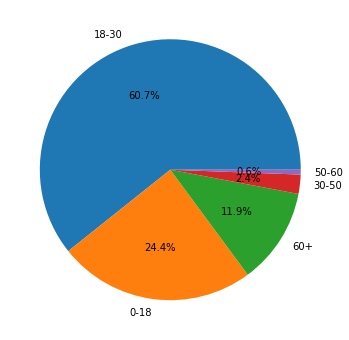

In [14]:
f, g = plt.subplots(figsize = (10, 6))
g.pie(data["Yas"].value_counts(), labels = Age.values(),autopct='%1.1f%%')
plt.show()

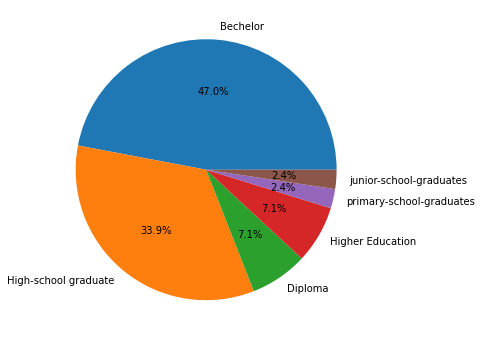

In [16]:
f, g = plt.subplots(figsize = (10, 6))
g.pie(data["Egitim"].value_counts(), labels = Edu.values(),autopct='%1.1f%%')
plt.show()

In [30]:
def plotData(Edu = None):
    df=data
    questions =  ["economy_good","education_reform",
         "against_Privatization","support_death_penalty","obejctive_journalists","alcohol_prohibition",
         "more_secular","abortion_ban","restricted_freedoms","support_new_party"]
    Edu_dict = dict(zip([5,3,4,6,1,2],['Bechelor','High-school graduate','Diploma','Higher Education','primary-school-graduates','junior-school-graduates']))
    
    if Edu == None:
        
        fig = plt.figure(figsize=(25,25))
        
        for i in range(0,10):
            p = fig.add_subplot(4,4,i+1)
            df[questions[i]].value_counts().plot(kind = 'pie', autopct='%.1f%%'); i = i + 1
            plt.ylabel(dict(zip(('Yes', 'No'),(1,0))), fontsize = 15)
            plt.title('Overall'+ ':' + questions[i-1])
            plt.grid()
            
    else:
        
        df = df[df['Egitim'] == Edu]
        fig = plt.figure(figsize=(25,25))
        
        for i in range(0,10):
            p = fig.add_subplot(4,4,i+1)
            df[questions[i]].value_counts().plot(kind = 'pie', autopct='%.1f%%'); i = i + 1
            plt.ylabel(dict(zip(('Yes', 'No'),(1,0))), fontsize = 15)
            plt.title(Edu_dict[Edu]+ ':' +questions[i-1])
            plt.grid()

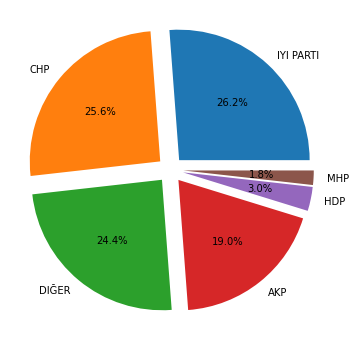

In [31]:
f, g = plt.subplots(figsize = (10, 6))
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

g.pie(data["parti"].value_counts(), explode = explode, labels = data["parti"].value_counts().index ,
        autopct='%1.1f%%')
plt.show()

KeyError: ignored

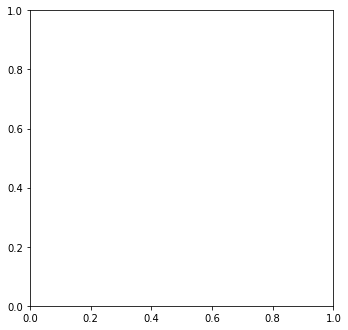

In [32]:
for j in range(1,7):
    plotData(j)

In [33]:
df = data.drop(data[data['Egitim'] < 3].index)
df['parti'].value_counts()

IYI PARTI    43
CHP          43
DIĞER        39
AKP          28
HDP           4
MHP           3
Name: parti, dtype: int64

In [35]:
df = df.drop(df[df['parti'].isin(['HDP','MHP','AKP'])].index)

In [36]:
df.shape

(125, 15)

NameError: ignored

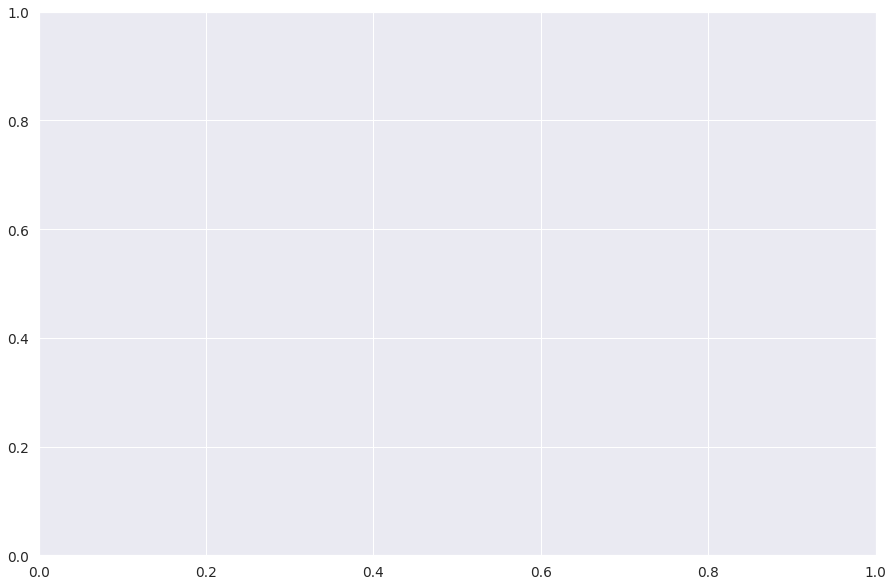

In [39]:
k = 14 
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=names, xticklabels=names)
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
df['parti'] = lr.fit_transform(df['parti'])
df['Bolge'] = lr.fit_transform(df['Bolge'])

In [46]:
from sklearn.model_selection import train_test_split
predictors = df.drop(['parti'], axis=1)
target = df["parti"]
X_train, x_test, Y_train, y_test = train_test_split(predictors, target, test_size = 0.25, random_state= 41)

In [47]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=41)
X_train_s, Y_train_s = sm.fit_resample(X_train, Y_train)

In [48]:
print("Shape of train_X: ", X_train_s.shape)
print("Shape of test_X: ", x_test.shape)

Shape of train_X:  (105, 14)
Shape of test_X:  (32, 14)


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
dt = DecisionTreeClassifier()
dt.fit(X_train_s, Y_train_s)
dt_pred = dt.predict(x_test)
cnf_matrix = confusion_matrix(y_test, dt_pred)
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44         8
           1       0.46      0.67      0.55         9
           2       0.67      0.40      0.50        15

    accuracy                           0.50        32
   macro avg       0.51      0.52      0.50        32
weighted avg       0.54      0.50      0.50        32



In [51]:
rfc = RandomForestClassifier()
rfc.fit(X_train_s,Y_train_s)
rfc_pred = rfc.predict(x_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44         8
           1       0.50      0.78      0.61         9
           2       0.50      0.27      0.35        15

    accuracy                           0.47        32
   macro avg       0.47      0.51      0.47        32
weighted avg       0.47      0.47      0.45        32



In [52]:
mlpc = MLPClassifier(hidden_layer_sizes=200,max_iter = 500)
mlpc.fit(X_train_s,Y_train_s)
mlpc_pred =mlpc.predict(x_test)
print(classification_report(y_test,mlpc_pred))

              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.46      0.67      0.55         9
           2       0.56      0.33      0.42        15

    accuracy                           0.50        32
   macro avg       0.51      0.54      0.51        32
weighted avg       0.52      0.50      0.49        32



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
